<a href="https://colab.research.google.com/github/neytism/EMC006-NOTEBOOKS/blob/main/TRANSPORTATION_DATASET_FINALS_DATA_SCIENCE_RANDOM_FOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATASET

In [33]:
import pandas as pd
import numpy as np
import random

# Seed for reproducibility
np.random.seed(42)
random.seed(42)

# Number of samples
num_samples = 100

# Generating Station Names
station_names = [
    "Grand Central", "Union Station", "Penn Station", "King's Cross", "Paddington", "Victoria",
    "Central Station", "Main Street", "West End", "East Side", "Northgate", "Southgate",
    "Riverside", "Lakeside", "Hilltop", "Midtown", "Downtown", "Uptown", "Harborview", "Bayfront"
]

stations = np.random.choice(station_names, num_samples)

# Generating Number of Passengers (between 50 and 500)
passengers = np.random.randint(50, 500, num_samples)

# Generating Number of Trains (between 1 and 10)
trains = np.random.randint(1, 10, num_samples)

# Generating Waiting Time (between 5 and 30 minutes)
waiting_time = np.random.randint(5, 30, num_samples)

# Generating Fare Price (between $2 and $20)
fare_price = np.round(np.random.uniform(2, 20, num_samples), 2)

# Creating DataFrame
data = {
    "Station Names": stations,
    "Number of Passengers": passengers,
    "Number of Trains": trains,
    "Waiting Time (minutes)": waiting_time,
    "Fare Price ($)": fare_price
}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Save the dataset to a CSV file
df.to_csv('/content/drive/MyDrive/CIIT-BSEMC/3rd year 3rd term/Data Science Programming/transportation_dataset.csv', index=False)

     Station Names  Number of Passengers  Number of Trains  \
0  Central Station                   148                 1   
1         Bayfront                   221                 8   
2          Hilltop                   409                 1   
3        Northgate                   263                 1   
4      Main Street                    84                 2   

   Waiting Time (minutes)  Fare Price ($)  
0                      20            8.48  
1                      16            4.29  
2                      23           11.40  
3                      26           15.86  
4                      27            5.88  


In [34]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/CIIT-BSEMC/3rd year 3rd term/Data Science Programming/transportation_dataset.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#EDA

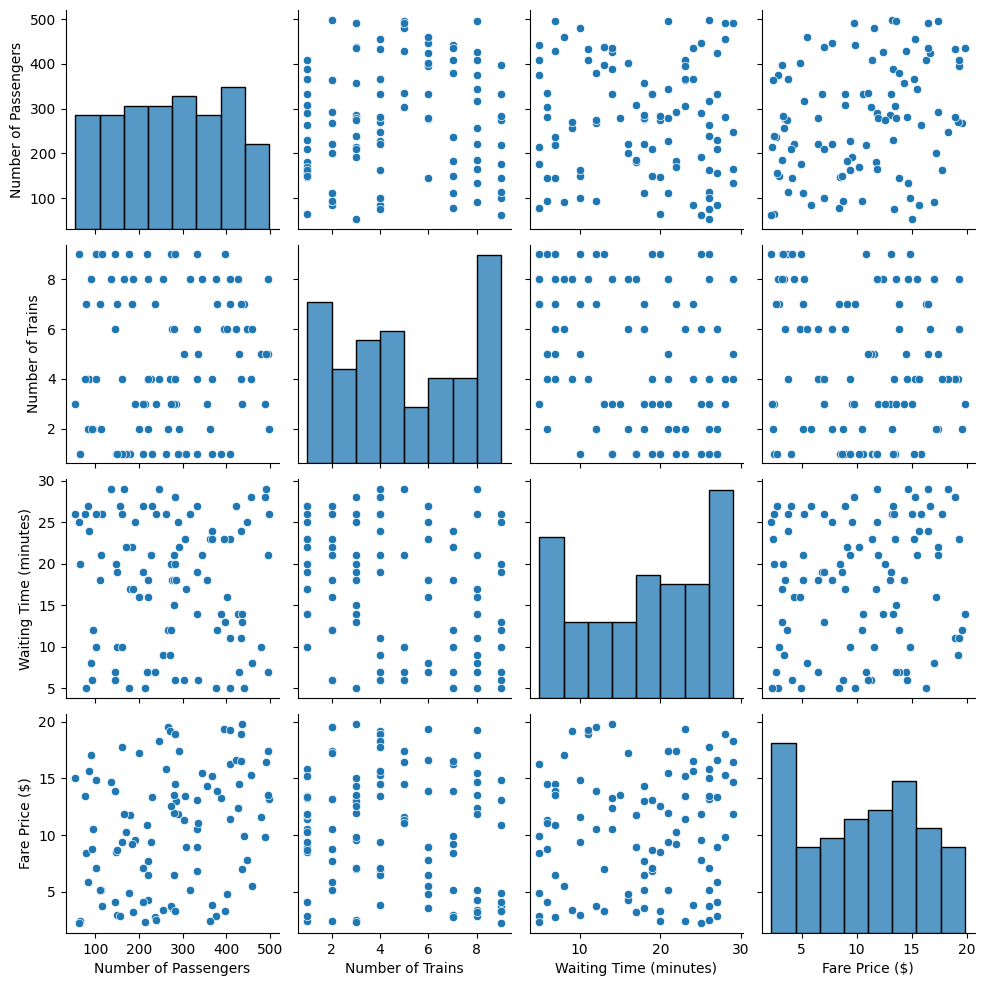

In [35]:
import seaborn as sns
sns.pairplot(df)

# Scatter Plot Insights

* **Number of Passenger vs. Fare Price:** There is no clear linear relationship between the number of passengers and the fare price. The data points are widely scattered.
* **Number of Passenger vs. Waiting Time:** Shows a wide dispersion, suggesting  no strong correlation between the number of passengers and the waiting time. Indicating no direct influence.
* **Number of Passenger vs. Number of Trains:** Again, wide spread no str0ng correlation.
* **Number of Trains vs. Waiting Time:** No clear relationship. Have a wide range of waiting times.
* **Number of Trains vs. Fare Price:** No clear pattern or correlation is visible.
* **Waiting Time vs. Fare Price:** There is also no string correlation between the two. Scatter plot shows tthat fares are distributed acress different waiting times without a clear pattern.

The scatter plots generally shows weak or no correlations between the variables, maybe because it is randomly generated or may be influenced by other external factors.


#MODELLING

##RANDOM FOREST REGRESSION

Mean Squared Error: 37.295569715499994
R2 Score: -0.18102500433516133


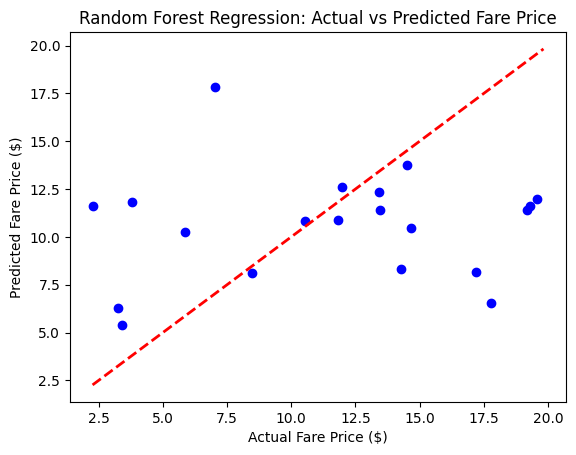

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Features and target variable
X = df[["Number of Passengers", "Number of Trains", "Waiting Time (minutes)"]]
y = df["Fare Price ($)"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_regressor.predict(X_test)

# Calculating the Mean Squared Error and R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plotting the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Fare Price ($)')
plt.ylabel('Predicted Fare Price ($)')
plt.title('Random Forest Regression: Actual vs Predicted Fare Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.show()

## RANDOM FOREST REGRESSION INSIGHT

# Spread

*   There is a noticable spread of points around the red dashed line, indicating that while some predictions are clode to the actual values, most of it are not.
*   This spread may suggest that the moel may have difficulty predicting fare prices accurately.

# Clusters and outliers

* There are clusters of points around certain fare prices. For example, the points around $10 and $12 are relatively close to the red line showing better prediction in this range
* There are also some outliers where the predicted fare arehigher or lower than the actual values.



## EDA INSIGHT:


Dataset overview:

it consists of the information on transformation including the station names, number of passengers, number of trains, waiting time, and prices of the fare.


* Station Names: Names of the transportation stations.
* Number of Passengers: Count of passengers at each station.
* Number of Trains: Number of trains available at each station.
* Waiting Time: Average waiting time for passengers in minutes.
* Fare Price: Cost of the fare in dollars.

In [42]:
df.describe()

,Number of Passengers,Number of Trains,Waiting Time (minutes),Fare Price ($)
count,100.000000,100.000000,100.00000,100.000000
mean,272.930000,4.650000,17.60000,10.455900
std,124.743798,2.713137,7.67391,5.240993
min,54.000000,1.000000,5.00000,2.260000
25%,168.750000,2.000000,10.75000,5.437500
50%,275.000000,4.000000,18.50000,10.695000
75%,377.000000,7.000000,25.00000,14.572500
max,498.000000,9.000000,29.00000,19.830000


## INSIGHTS

Passenger Distribution:

* **High Traffic Stations:** Stations like Central Station and Union Station have the highest passenger numbers, indicating these are key hubs in the network. For example, Central Station has 498 passengers, which is significantly higher than the average.

* **Low Traffic Stations:** Stations like Penn Station and Bayfront Station have relatively fewer passengers, with Penn Station having only 54 passengers.

Train Availability:

* **Under-served Stations:** Stations like Hilltop, Central Station, and West End have only 1 train serving them. This is notable considering Hilltop has a high number of passengers (409). Increasing the number of trains at these stations could improve service efficiency and reduce waiting times.

* **Well-served Stations:** Lakeside has 9 trains, which aligns well with its high passenger count (397). This suggests that the station is adequately serviced, balancing train availability with passenger demand.

Waiting Time:

* **Stations with Long Waiting Times:** Hilltop and Central Station have longer waiting time (29). Despite Central Station having 491 passengers, the long wait could show inneficiency in train scheculing or capacity issues.

* **Stations with Short Waiting Times:** Grand Central has a short waiting time of 5 minutes, which is efficient considering it serves 214 passengers with 3 trains.

Fare Price:

* **High Fare Stations:** Grand Central and Union Station have higher fare prices (19.83 and 19.57), which might reflect longer travel distances or premium servixes. The high fare at Union Station might also explain its lower passenger count compared to Grand Central.

* **Low Fare Stations:** Bayfront and Main Street have lower fare prices (2.26 and 2.73), making them more accessible. Main Street's low fare might contribute to its higher passenger count despite having 2 trains.